In [1]:
import pandas as pd
import matplotlib.pyplot as plt
SMALL_SIZE = 11
MEDIUM_SIZE = 12
BIGGER_SIZE = 13

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

In [2]:
results_fixed = pd.read_excel('/Users/mc4117/Documents/adapt_utils_paper/adapt_utils/unsteady/test_cases/beach_slope/results/results_beach2.xls', sheet_name = 'fixed')

In [4]:
opt_sub = results_fixed.loc['optimal sub']
opt_whole = results_fixed.loc['optimal whole']

fixed_sub = results_fixed.loc['fixed sub']
fixed_whole = results_fixed.loc['fixed whole']

gen_sub = results_fixed.loc['7; 0; 1']
gen_whole = results_fixed.loc['7; 1; 0']

deltax = [220/i for i in results_fixed.columns.values]

plt.loglog(deltax, fixed_sub, label = 'Fixed mesh')
plt.loglog(deltax, gen_sub, label = 'General parameter')
plt.loglog(deltax, opt_sub, label = 'Optimum parameters')
plt.grid()
plt.xlabel('Number of mesh elements in x-direction')
plt.ylabel('L2 error norm')

plt.xlim([min(deltax), 165])
plt.legend()
plt.show()

plt.loglog(deltax, fixed_whole, label = 'Fixed mesh')
plt.loglog(deltax, gen_whole, label = 'General parameter')
plt.loglog(deltax, opt_whole, label = 'Optimum parameters')
plt.xlabel('Number of mesh elements in x-direction')
plt.ylabel('L2 error norm')
plt.grid()
plt.xlim([min(deltax), 165])
plt.legend()
plt.show()

KeyError: 'optimal sub'

In [6]:
cost_vs_error = pd.read_excel('/Users/mc4117/Documents/adapt_utils_paper/adapt_utils/unsteady/test_cases/beach_slope/results/results_beach2.xls', index_col = 2, sheet_name = 'Sheet1 (2)').reset_index(drop = False)

<ipython-input-7-71daf4949378>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  adapt_whole = cost_vs_error[['mesh movement', 'error', 'time']][0:25][cost_vs_error['mesh movement'] != 0.0]
<ipython-input-7-71daf4949378>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fixed_whole = cost_vs_error[['mesh movement', 'error', 'time']][0:25][cost_vs_error['mesh movement'] == 0.0]


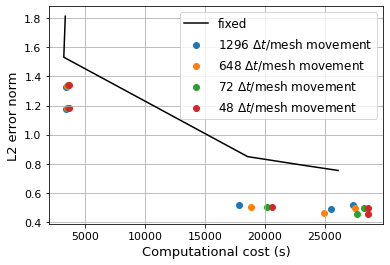

In [7]:
adapt_whole = cost_vs_error[['mesh movement', 'error', 'time']][0:25][cost_vs_error['mesh movement'] != 0.0]
fixed_whole = cost_vs_error[['mesh movement', 'error', 'time']][0:25][cost_vs_error['mesh movement'] == 0.0]

plt.scatter(adapt_whole['time'][cost_vs_error['mesh movement'] == 1296], adapt_whole['error'][cost_vs_error['mesh movement'] == 1296], label = r'1296 $\Delta t$/mesh movement')
plt.scatter(adapt_whole['time'][cost_vs_error['mesh movement'] == 648], adapt_whole['error'][cost_vs_error['mesh movement'] == 648], label = r'648 $\Delta t$/mesh movement')
plt.scatter(adapt_whole['time'][cost_vs_error['mesh movement'] == 72], adapt_whole['error'][cost_vs_error['mesh movement'] == 72], label = r'72 $\Delta t$/mesh movement')
plt.scatter(adapt_whole['time'][cost_vs_error['mesh movement'] == 48], adapt_whole['error'][cost_vs_error['mesh movement'] == 48], label = r'48 $\Delta t$/mesh movement')
plt.plot(fixed_whole['time'], fixed_whole['error'], 'k', label = 'fixed')
plt.grid()
plt.legend()
plt.xlabel('Computational cost (s)')
plt.ylabel('L2 error norm')
plt.show()

<ipython-input-8-ceb48d675d77>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  adapt_min = cost_vs_error[['mesh movement', 'subdomain error', 'time']][33:57][cost_vs_error['mesh movement'] != 0.0].dropna()
<ipython-input-8-ceb48d675d77>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fixed_min = cost_vs_error[['mesh movement', 'subdomain error', 'time']][33:57][cost_vs_error['mesh movement'] == 0.0].dropna()


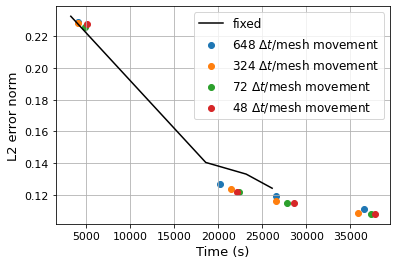

In [8]:
adapt_min = cost_vs_error[['mesh movement', 'subdomain error', 'time']][33:57][cost_vs_error['mesh movement'] != 0.0].dropna()
fixed_min = cost_vs_error[['mesh movement', 'subdomain error', 'time']][33:57][cost_vs_error['mesh movement'] == 0.0].dropna()

sorted_adapt_min = adapt_min.sort_values(by = ['time']).reset_index(drop =True)
sorted_fixed_min = fixed_min.sort_values(by = ['time']).reset_index(drop =True)

fig1, ax1 = plt.subplots()
ax1.scatter(sorted_adapt_min['time'][sorted_adapt_min['mesh movement'] == 648], sorted_adapt_min['subdomain error'][sorted_adapt_min['mesh movement'] == 648], label = r'648 $\Delta t$/mesh movement')
ax1.scatter(sorted_adapt_min['time'][sorted_adapt_min['mesh movement'] == 324], sorted_adapt_min['subdomain error'][sorted_adapt_min['mesh movement'] == 324], label = r'324 $\Delta t$/mesh movement')
ax1.scatter(sorted_adapt_min['time'][sorted_adapt_min['mesh movement'] == 72], sorted_adapt_min['subdomain error'][sorted_adapt_min['mesh movement'] == 72], label = r'72 $\Delta t$/mesh movement')
ax1.scatter(sorted_adapt_min['time'][sorted_adapt_min['mesh movement'] == 48], sorted_adapt_min['subdomain error'][sorted_adapt_min['mesh movement'] == 48], label = r'48 $\Delta t$/mesh movement')
ax1.plot(sorted_fixed_min['time'], sorted_fixed_min['subdomain error'], 'k', label = 'fixed')
#plt.xlim([800, 14000])
#ax1.set_xscale('log')
#ax1.set_yscale('log')
plt.xlabel('Time (s)')
plt.ylabel('L2 error norm')
plt.legend()
plt.grid()
plt.show()

In [3]:
results_02 = pd.read_excel('/Users/mc4117/Documents/adapt_utils_paper/adapt_utils/unsteady/test_cases/beach_slope/results/results_beach2.xls', sheet_name = '0.2')
results_025 = pd.read_excel('/Users/mc4117/Documents/adapt_utils_paper/adapt_utils/unsteady/test_cases/beach_slope/results/results_beach2.xls', sheet_name = '0.25')
results_05 = pd.read_excel('/Users/mc4117/Documents/adapt_utils_paper/adapt_utils/unsteady/test_cases/beach_slope/results/results_beach2.xls', sheet_name = '0.5')
results_06 = pd.read_excel('/Users/mc4117/Documents/adapt_utils_paper/adapt_utils/unsteady/test_cases/beach_slope/results/results_beach2.xls', sheet_name = '0.6')
results_075 = pd.read_excel('/Users/mc4117/Documents/adapt_utils_paper/adapt_utils/unsteady/test_cases/beach_slope/results/results_beach2.xls', sheet_name = '0.75')

time_output = pd.read_excel('/Users/mc4117/Documents/adapt_utils_paper/adapt_utils/unsteady/test_cases/beach_slope/results/results_beach2.xls', sheet_name = 'time_per_movement', header = None)

results_tol = pd.read_excel('/Users/mc4117/Documents/adapt_utils_paper/adapt_utils/unsteady/test_cases/beach_slope/results/results_beach2.xls', sheet_name = 'tol')

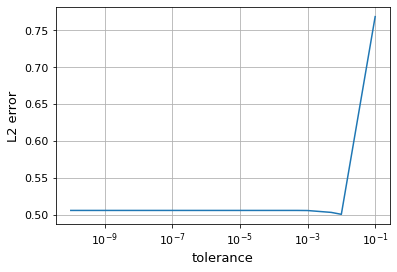

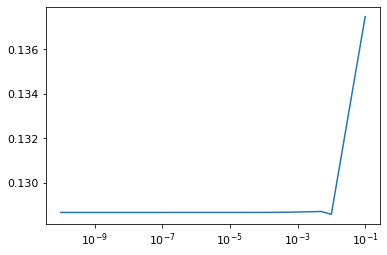

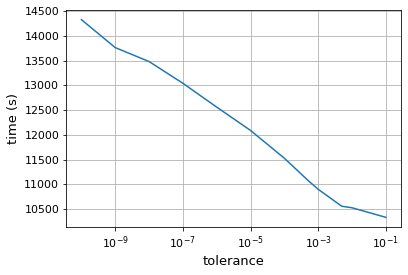

In [15]:
# 5; 1; 0 72 tolerance

tol = results_tol['tol'][:-1]
L2_error = results_tol['L2'][:-1]
subdomain_error = results_tol['subdomain'][:-1]
time = results_tol['time'][:-1]

plt.semilogx(tol, L2_error)
plt.xlabel('tolerance')
plt.ylabel('L2 error')
plt.grid()
plt.show()
plt.semilogx(tol, subdomain_error)
plt.show()

plt.semilogx(tol, time)
plt.xlabel('tolerance')
plt.ylabel('time (s)')
plt.grid()
plt.show()

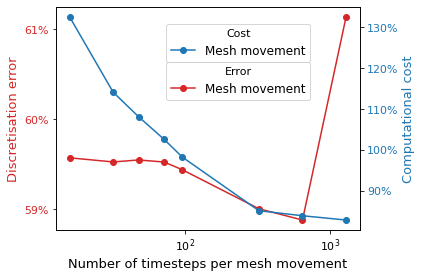

In [4]:
import matplotlib.ticker as mtick

# 5; 1; 0

error_list = []
time_list = []

for i in time_output.iloc[0][1:-3]:
    error_list.append(time_output.iloc[2][10])
    time_list.append(time_output.iloc[1][10])
    
timesteps = time_output.iloc[0][1:-3].reset_index(drop = True)
diff_error = time_output.iloc[2][1:-3].reset_index(drop = True)
diff_time = time_output.iloc[1][1:-3].reset_index(drop = True)

fig, ax1 = plt.subplots()


color = 'tab:red'
ax1.set_xlabel('Number of timesteps per mesh movement')
ax1.set_ylabel('Discretisation error', color=color)
#ax1.semilogx(diff_time.columns.values[2:-1], diff_time.iloc[0][2:-1], ':', label = r'$\alpha = 3$', color=color)

ax1.semilogx(timesteps, diff_error/error_list[0], '-o', label = 'Mesh movement', color=color)
#ax1.semilogx(timesteps, diff_error, '-o', label = 'Mesh movement', color=color)
#ax1.semilogx(diff_time.columns.values[2:-1], diff_time.iloc[2][2:-1], ':', label = r'$\alpha = 5$', color=color)
ax1.set_yticks([0.59, 0.6, 0.61])
ax1.set_yticklabels([0.59, 0.6, 0.61])
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.minorticks_off()
plt.legend(loc = 9, bbox_to_anchor=(0.6, 0.78), title = "Error")
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Computational cost', color=color)  # we already handled the x-label with ax1
ax2.semilogx(timesteps, diff_time/time_list[0], '-o', label = 'Mesh movement', color=color)
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ax2.tick_params(axis='y', labelcolor=color)
plt.minorticks_off()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend(loc = 9, bbox_to_anchor=(0.6, 0.95), title = "Cost")
plt.show()

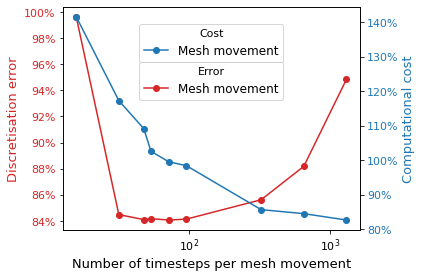

In [5]:
# 7; 0; 1

error_list = []
time_list = []

for i in time_output.iloc[6][1:-2]:
    error_list.append(time_output.iloc[8][11])
    time_list.append(time_output.iloc[7][11])
    
timesteps = time_output.iloc[6][1:-2].reset_index(drop = True)
diff_error = time_output.iloc[8][1:-2].reset_index(drop = True)
diff_time = time_output.iloc[7][1:-2].reset_index(drop = True)

fig, ax1 = plt.subplots()


color = 'tab:red'
ax1.set_xlabel('Number of timesteps per mesh movement')
ax1.set_ylabel('Discretisation error', color=color)
ax1.semilogx(timesteps, diff_error/error_list[0], '-o', label = 'Mesh movement', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.minorticks_off()
plt.legend(loc = 9, bbox_to_anchor=(0.5, 0.78), title = "Error")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Computational cost', color=color)  # we already handled the x-label with ax1
ax2.semilogx(timesteps, diff_time/time_list[0], '-o', label = 'Mesh movement', color=color)
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.minorticks_off()

ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend(loc = 9, bbox_to_anchor=(0.5, 0.95), title = "Cost")
plt.show()

/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be

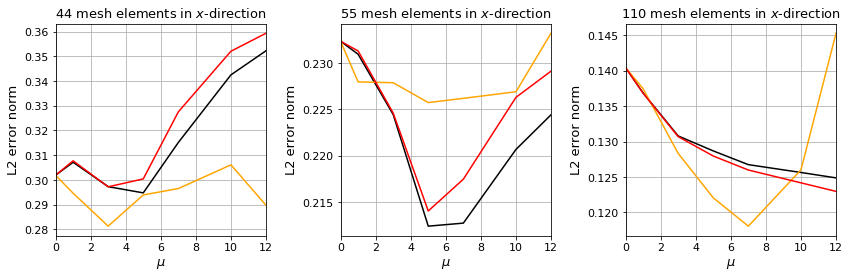

/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


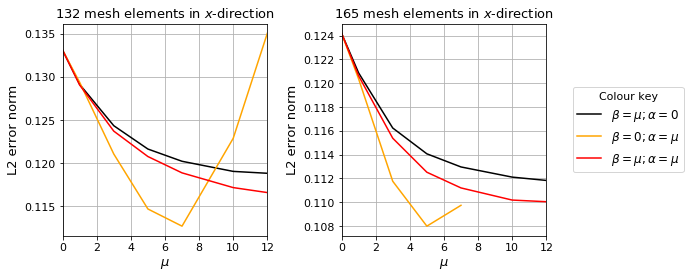

In [44]:
import pylab as plt

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(12,4))

ax1.plot(results_02[results_02['beta']==1][results_02['gamma']==0]['alpha'], results_02[results_02['beta']==1][results_02['gamma']==0][72], color = 'black', label = r'$\Delta x = 5; \beta = 1; \gamma = 0$')
ax1.plot(results_02[results_02['beta']==0][results_02['gamma']==1]['alpha'], results_02[results_02['beta']==0][results_02['gamma']==1][72], color = 'orange', label = r'$\Delta x = 5; \beta = 0; \gamma = 1$')
ax1.plot(results_02[results_02['beta']==1][results_02['gamma']==1]['alpha'], results_02[results_02['beta']==1][results_02['gamma']==1][72], color = 'red', label = r'$\Delta x = 5; \beta = 1; \gamma = 1$')
ax1.set_xlim([0, 12])
ax1.set_xlabel(r"$\mu$")
ax1.set_ylabel("L2 error norm")
#ax1.set_title(r'$\Delta x = 5m$')
ax1.set_title(r"44 mesh elements in $x$-direction")
ax1.grid()


ax2.plot(results_025[results_025['beta']==1][results_025['gamma']==0]['alpha'], results_025[results_025['beta']==1][results_025['gamma']==0][72], color = 'black', label = r'$\Delta x = 4; \beta = 1; \gamma = 0$')
ax2.plot(results_025[results_025['beta']==0][results_025['gamma']==1]['alpha'], results_025[results_025['beta']==0][results_025['gamma']==1][72], color = 'orange', label = r'$\Delta x = 4; \beta = 0; \gamma = 1$')
ax2.plot(results_025[results_025['beta']==1][results_025['gamma']==1]['alpha'], results_025[results_025['beta']==1][results_025['gamma']==1][72], color = 'red', label = r'$\Delta x = 4; \beta = 1; \gamma = 1$')
ax2.set_xlim([0, 12])
ax2.set_xlabel(r"$\mu$")
ax2.set_ylabel("L2 error norm")
ax2.set_title(r"55 mesh elements in $x$-direction")
ax2.grid()

ax3.plot(results_05[results_05['beta']==1][results_05['gamma']==0]['alpha'], results_05[results_05['beta']==1][results_05['gamma']==0][72], color = 'black', label = r'$\Delta x = 2; \beta = 1; \gamma = 0$')
ax3.plot(results_05[results_05['beta']==0][results_05['gamma']==1]['alpha'], results_05[results_05['beta']==0][results_05['gamma']==1][72], color = 'orange', label = r'$\Delta x = 2; \beta = 0; \gamma = 1$')
ax3.plot(results_05[results_05['beta']==1][results_05['gamma']==1]['alpha'], results_05[results_05['beta']==1][results_05['gamma']==1][72], color = 'red', label = r'$\Delta x = 2; \beta = 1; \gamma = 1$')
ax3.set_xlim([0, 12])
ax3.set_xlabel(r"$\mu$")
ax3.set_ylabel("L2 error norm")
ax3.set_title(r"110 mesh elements in $x$-direction")
ax3.grid()

fig.tight_layout()
plt.show()

fig, ((ax4, ax5)) = plt.subplots(1, 2, figsize=(10,4))
ax4.plot(results_06[results_06['beta']==1][results_06['gamma']==0]['alpha'], results_06[results_06['beta']==1][results_06['gamma']==0][72], color = 'black', label = r'$\Delta x = 5/3; \beta = 1; \gamma = 0$')
ax4.plot(results_06[results_06['beta']==0][results_06['gamma']==1]['alpha'], results_06[results_06['beta']==0][results_06['gamma']==1][72], color = 'orange', label = r'$\Delta x = 5/3; \beta = 0; \gamma = 1$')
ax4.plot(results_06[results_06['beta']==1][results_06['gamma']==1]['alpha'], results_06[results_06['beta']==1][results_06['gamma']==1][72], color = 'red', label = r'$\Delta x = 5/3; \beta = 1; \gamma = 1$')
ax4.set_xlim([0, 12])
ax4.set_xlabel(r"$\mu$")
ax4.set_ylabel("L2 error norm")
ax4.set_title(r"132 mesh elements in $x$-direction")
ax4.grid()

ax5.plot(results_075[results_075['beta']==1][results_075['gamma']==0]['alpha'], results_075[results_075['beta']==1][results_075['gamma']==0][72], color = 'black', label = r'$\beta = \mu; \alpha = 0$')
ax5.plot(results_075[results_075['beta']==0][results_075['gamma']==1]['alpha'][0:5], results_075[results_075['beta']==0][results_075['gamma']==1][72][0:5], color = 'orange', label = r'$\beta = 0; \alpha = \mu$')
ax5.plot(results_075[results_075['beta']==1][results_075['gamma']==1]['alpha'], results_075[results_075['beta']==1][results_075['gamma']==1][72], color = 'red', label = r'$\beta = \mu; \alpha = \mu$')
ax5.set_xlim([0, 12])
ax5.set_xlabel(r"$\mu$")
ax5.set_ylabel("L2 error norm")
ax5.set_title(r"165 mesh elements in $x$-direction")
ax5.grid()

#ax6.set_xlim([0, 12])
#ax6.set_xlabel(r"$\mu$")
#ax6.set_ylabel("L2 error norm")
#ax6.set_title(r'$\Delta x = 1m$')
#ax6.grid()
ax5.legend(loc = 10, bbox_to_anchor=(1.4, 0.5), title = 'Colour key')
fig.tight_layout()
plt.show()


/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be

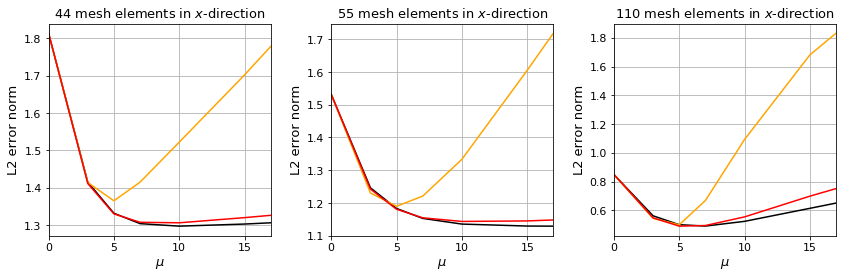

/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/mc4117/firedrake2/firedrake/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


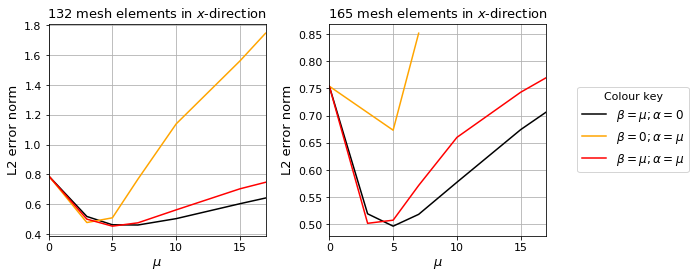

In [45]:
import pylab as plt

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(12,4))

ax1.plot(results_02[results_02['beta_2']==1][results_02['gamma_2']==0]['alpha_2'], results_02[results_02['beta_2']==1][results_02['gamma_2']==0][648], color = 'black', label = r'$\Delta x = 5; \beta = \mu; \alpha = 0$')
ax1.plot(results_02[results_02['beta_2']==0][results_02['gamma_2']==1]['alpha_2'], results_02[results_02['beta_2']==0][results_02['gamma_2']==1][648], color = 'orange', label = r'$\Delta x = 5; \beta = 0; \gamma = 1$')
ax1.plot(results_02[results_02['beta_2']==1][results_02['gamma_2']==1]['alpha_2'], results_02[results_02['beta_2']==1][results_02['gamma_2']==1][648], color = 'red', label = r'$\Delta x = 5; \beta = 1; \gamma = 1$')
ax1.set_xlim([0, 17])
ax1.set_xlabel(r"$\mu$")
ax1.set_ylabel("L2 error norm")
#ax1.set_title(r'$\Delta x = 5m$')
ax1.set_title(r"44 mesh elements in $x$-direction")
ax1.grid()


ax2.plot(results_025[results_025['beta_2']==1][results_025['gamma_2']==0]['alpha_2'], results_025[results_025['beta_2']==1][results_025['gamma_2']==0][648], color = 'black', label = r'$\Delta x = 4; \beta = 1; \gamma = 0$')
ax2.plot(results_025[results_025['beta_2']==0][results_025['gamma_2']==1]['alpha_2'], results_025[results_025['beta_2']==0][results_025['gamma_2']==1][648], color = 'orange', label = r'$\Delta x = 4; \beta = 0; \gamma = 1$')
ax2.plot(results_025[results_025['beta_2']==1][results_025['gamma_2']==1]['alpha_2'], results_025[results_025['beta_2']==1][results_025['gamma_2']==1][648], color = 'red', label = r'$\Delta x = 4; \beta = 1; \gamma = 1$')
ax2.set_xlim([0, 17])
ax2.set_xlabel(r"$\mu$")
ax2.set_ylabel("L2 error norm")
ax2.set_title(r"55 mesh elements in $x$-direction")
ax2.grid()

ax3.plot(results_05[results_05['beta_2']==1][results_05['gamma_2']==0]['alpha_2'], results_05[results_05['beta_2']==1][results_05['gamma_2']==0][648], color = 'black', label = r'$\Delta x = 2; \beta = 1; \gamma = 0$')
ax3.plot(results_05[results_05['beta_2']==0][results_05['gamma_2']==1]['alpha_2'], results_05[results_05['beta_2']==0][results_05['gamma_2']==1][648], color = 'orange', label = r'$\Delta x = 2; \beta = 0; \gamma = 1$')
ax3.plot(results_05[results_05['beta_2']==1][results_05['gamma_2']==1]['alpha_2'], results_05[results_05['beta_2']==1][results_05['gamma_2']==1][648], color = 'red', label = r'$\Delta x = 2; \beta = 1; \gamma = 1$')
ax3.set_xlim([0, 17])
ax3.set_xlabel(r"$\mu$")
ax3.set_ylabel("L2 error norm")
ax3.set_title(r"110 mesh elements in $x$-direction")
ax3.grid()

fig.tight_layout()
plt.show()

fig, ((ax4, ax5)) = plt.subplots(1, 2, figsize=(10,4))

ax4.plot(results_06[results_06['beta_2']==1][results_06['gamma_2']==0]['alpha_2'], results_06[results_06['beta_2']==1][results_06['gamma_2']==0][648], color = 'black', label = r'$\Delta x = 5/3; \beta = 1; \gamma = 0$')
ax4.plot(results_06[results_06['beta_2']==0][results_06['gamma_2']==1]['alpha_2'], results_06[results_06['beta_2']==0][results_06['gamma_2']==1][648], color = 'orange', label = r'$\Delta x = 5/3; \beta = 0; \gamma = 1$')
ax4.plot(results_06[results_06['beta_2']==1][results_06['gamma_2']==1]['alpha_2'], results_06[results_06['beta_2']==1][results_06['gamma_2']==1][648], color = 'red', label = r'$\Delta x = 5/3; \beta = 1; \gamma = 1$')
ax4.set_xlim([0, 17])
ax4.set_xlabel(r"$\mu$")
ax4.set_ylabel("L2 error norm")
ax4.set_title(r"132 mesh elements in $x$-direction")
ax4.grid()

ax5.plot(results_075[results_075['beta_2']==1][results_075['gamma_2']==0]['alpha_2'], results_075[results_075['beta_2']==1][results_075['gamma_2']==0][648], color = 'black', label = r'$\beta = \mu; \alpha = 0$')
ax5.plot(results_075[results_075['beta_2']==0][results_075['gamma_2']==1]['alpha_2'].drop(4)[0:3], results_075[results_075['beta_2']==0][results_075['gamma_2']==1][648].drop(4)[0:3], color = 'orange', label = r'$\beta = 0; \alpha = \mu$')
ax5.plot(results_075[results_075['beta_2']==1][results_075['gamma_2']==1]['alpha_2'], results_075[results_075['beta_2']==1][results_075['gamma_2']==1][648], color = 'red', label = r'$\beta = \mu; \alpha = \mu$')
ax5.set_xlim([0, 17])
ax5.set_xlabel(r"$\mu$")
ax5.set_ylabel("L2 error norm")
ax5.set_title(r"165 mesh elements in $x$-direction")
ax5.grid()

#ax6.set_xlim([0, 15])
#ax6.set_xlabel(r"$\mu$")
#ax6.set_ylabel("L2 error norm")
#ax6.set_title(r'$\Delta x = 1m$')
#ax6.grid()
#ax6.legend(loc = 10, bbox_to_anchor=(1.4, 1), title = 'Colour key')
ax5.legend(loc = 10, bbox_to_anchor=(1.4, 0.5), title = 'Colour key')
fig.tight_layout()
plt.show()
